In [3]:
import rsa, math, time
import matplotlib.pyplot as plt 

In [5]:
#RSA BASICS
(pubkey,privkey)=rsa.newkeys(32)
for i in range(0, 10):
    print(f'd * e mod e(n) = ? You have {10-i} attempts')
    x = int(input())
    en = (privkey.p - 1) * (privkey.q - 1)
    result = (privkey.d * privkey.e) % en
    if result == x:
        print('Congratulations! You right!')
        break
    else:
        print('No, it mistake ')


        

d * e mod e(n) = ? You have 10 attempts
5
no it mistake 
d * e mod e(n) = ? You have 9 attempts
1
Congratulations! You right!


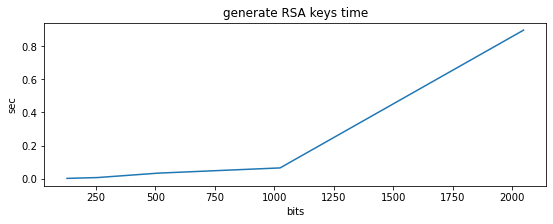

In [20]:
#GENERATE NEW KEYS TRY 3-5 times
keys = [128,256,512,1024, 2048]
gen_time = list ()
for key in keys:
    t_start = time.perf_counter()
    (pubkey,privkey)=rsa.newkeys(key)
    t_stop = time.perf_counter()
    gen_time.append(t_stop - t_start)
    
plt.figure(figsize=(9, 3))
plt.title('generate RSA keys time')
plt.xlabel('bits')
plt.ylabel('sec')
plt.plot(keys, gen_time)
plt.show()

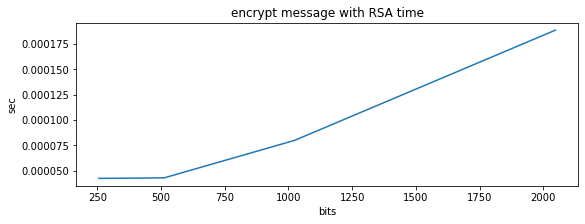

In [25]:
#ENCRYPT MESAGE WITH RSA public key
keys = [256,512,1024, 2048]
message = 'p@ssW0rD'.encode()
gen_time = list()
for key in keys:    
    (pubkey,privkey)=rsa.newkeys(key)
    t_start = time.perf_counter()
    rsa.encrypt(message, pubkey)
    t_stop = time.perf_counter()
    gen_time.append(t_stop - t_start)

plt.figure(figsize=(9, 3))
plt.title('encrypt message with RSA time')
plt.xlabel('bits')
plt.ylabel('sec')
plt.plot(keys, gen_time)
plt.show()

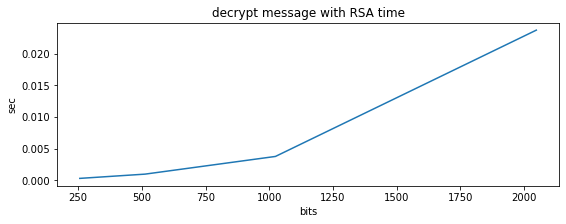

In [26]:
#DECRYPT MESAGE WITH RSA public key
keys = [256,512,1024, 2048]
message = 'p@ssW0rD'.encode()
gen_time = list()
for key in keys:    
    (pubkey,privkey)=rsa.newkeys(key)
    cipher = rsa.encrypt(message, pubkey)
    t_start = time.perf_counter()
    text = rsa.decrypt(cipher, privkey)
    t_stop = time.perf_counter()
    gen_time.append(t_stop - t_start)

plt.figure(figsize=(9, 3))
plt.title('decrypt message with RSA time')
plt.xlabel('bits')
plt.ylabel('sec')
plt.plot(keys, gen_time)
plt.show()

In [8]:
#TEXT ENCRYPTION LIMITATIONS
#if len(text) > n = p * q TEXT will be broken with encryption
#LET'S TEST IT!
(pubkey,privkey)=rsa.newkeys(128)
message = ''
while message != 'exit':
    message = input()
    try:
        cipher = rsa.encrypt(message.encode(),pubkey)
        print ('Cipher = ', cipher)
        print('Text lenght =',len(message), 'Try text longer than it!')
    except BaseException as err:
        exc = str(err).split()
        print(f'Oh! something go wronge, try text len <={exc[len(exc)-1]}')


1234567
5
exit
Cipher =  b'cLU\x15]\x03\xcc\x12\xf68\xb2\x97\\\xb9k\xfa'
Text lenght = 4 Try text longer than it!


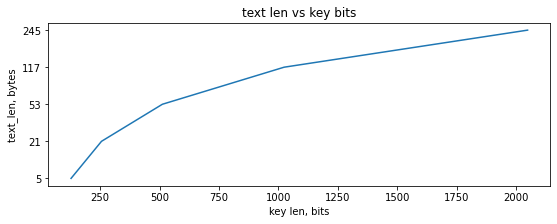

In [16]:
#TEXT LEN VS RSA BITS
keys = [128,256,512,1024,2048]
m1 = 'the RSA was very good 50 years ago, but not now in 2021. Try ECC much better. Trust me.'
m2 = 'With 2048 RSA key you can make a cipher from a poem! 32 key in not enough to cipher (a)'
m3 = 'random string for test test test test test test test test test test test test test test'
message = (m1+m2+m3).encode()
max_test_len = list()
for key in keys:    
    (pubkey,privkey)=rsa.newkeys(key)
    try:
        cipher = rsa.encrypt(message, pubkey)
    except BaseException as err:
        exc = str(err).split()
        max_test_len.append(exc[len(exc)-1])


plt.figure(figsize=(9, 3))
plt.title('text len vs key bits')
plt.xlabel('key len, bits')
plt.ylabel('text_len, bytes')
plt.plot(keys,  max_test_len)
plt.show()

In [7]:
#SIGN AND VERIFY TEXT WITH RSA. Let's try!
(pubkey,privkey)=rsa.newkeys(512)
message =''
while message != 'exit'.encode():
    message = input().encode()
    sign = rsa.sign(message, privkey, 'MD5')
    print(f'The sign for {message} = {sign}') 
    print('Input message again to check it!')
    message = input().encode()
    try:
        check = rsa.verify(message,sign,pubkey)    
        print('The sign for message is valid!')
    except BaseException:
        print('The sign is not valid for this message!')
    
    print('Try it one more time, or type exit')
    

hello!
The sign for b'hello!' = b'yX}\xc9\xc1\xa8\x9d%\xb6T\xd6\xe4R\x7f1K\xcaV\x13\xa4=\xb9\x16\xc5|jI\xb3?V\xadt\xec\xf0\x15\xf2\xd4\xda(\x98\x8d\xca8\xf8r\xca\xd3\x12\xd6\x87\x14\xa8\x17\xf6\x81\x9cr\xc3\x18\x8f\xc7\r\x06\x7f'
Input message again to check it!
hello!
The sign for message is valid!
Try it one more time, or type exit
hello123
The sign for b'hello123' = b'A\xa0\x9f\xdd\x9e{[x\x19mhXb\xd2%e_\xa8\xea~`J\xbb\xaa\x15(\xd8o\xfa\xe5\xaa\xbb\xd2\x88\xbc\xc3\xbc\x1do\x94\xc2\x06\x8c\xe0&\xaa7\xda\x92\xdb\xa8\xc9i\xb5i\xa1\x04\xa7s\x1bb\xc8P\x81'
Input message again to check it!
hello
The sign is not valid for this message!
Try it one more time, or type exit
exit
The sign for b'exit' = b'=u~\xc5\xa1/\xae]\xf6\x1e\xbb_\x8e\xe2L\x85\xf8\x8e\x97\xc3\x8ab\x14\\\xf7\xac\x9a\x83\x11\x14c0"\x88\xc966\x1b\tu"9\xa0\xecz<a\x1b\xd5\x9e\xe2\xa7\xd8\x9a\x1a\x9f\x8b\x08q,\x80\x03\x00\xd3'
Input message again to check it!
exit
The sign for message is valid!
Try it one more time, or type exit


In [6]:
#RSA KEY RAW BRUTEFORCE
(pubkey,privkey)=rsa.newkeys(16)
print ('Мы знаем публичный ключ n=', pubkey.n, 'и публичную экспоненту e=',pubkey.e)
n = pubkey.n
e = pubkey.e
t1_start = time.perf_counter()
secret1 = pow (12345, e, n)
secret2 = pow (123456, e, n)
t1_stop = time.perf_counter()
print ('и зашифрованный пароль1=', secret1, 'текст - 12345')
print ('Время затраченное на шифрование = ', t1_stop - t1_start, 'сек.')
print ('и зашифрованный пароль2=', secret2, 'текст - 123456')
t2_start = time.perf_counter()
for i in range (2,n):    
    if n % i == 0:
        p = i    
        break    
print ('Вычисляем один из множителей p=',p)    
q = int (n / p)
exp1 = p - 1
exp2 = int(n/p - 1)
mod = exp1*exp2
print ('и модуль mod=',mod)
t2_stop = time.perf_counter()
print ('Время затраченное на подбор множителей = ', t2_stop - t2_start, 'сек.')
buf = e % mod
for i in range (2,int(mod)):  
    tst = i % mod
    test = tst*buf % mod
    if test == 1:
        d = i
        break
print ('Секретный ключ d=', d)

t3_start = time.perf_counter()
password1 = pow (secret1, d, n)
password2 = pow (secret2, d, n)
t3_stop = time.perf_counter()
print ("Расшифровываем сообщение1 - ", password1)
print ('Время затраченное на расшифровку = ', t3_stop - t3_start, 'сек.')
print ("Расшифровываем сообщение2 - ", password2)

Мы знаем публичный ключ n= 34579 и публичную экспоненту e= 65537
и зашифрованный пароль1= 25741 текст - 12345
Время затраченное на шифрование =  6.269999994401587e-05 сек.
и зашифрованный пароль2= 6650 текст - 123456
Вычисляем один из множителей p= 151
и модуль mod= 34200
Время затраченное на подбор множителей =  0.00023590000000695 сек.
Секретный ключ d= 30473
Расшифровываем сообщение1 -  12345
Время затраченное на расшифровку =  5.49000005776179e-05 сек.
Расшифровываем сообщение2 -  19719


In [3]:
#Smart RSA bruteforcer with Atkin sieve
counter = 0
key_len = 48
limit = 10000000
tests = 1

def sieveOfAtkin(limit):
    P = [2,3]
    sieve=[False]*(limit+1)
    for x in range(1,int(math.sqrt(limit))+1):
        for y in range(1,int(math.sqrt(limit))+1):
            n = 4*x**2 + y**2
            if n<=limit and (n%12==1 or n%12==5) : sieve[n] = not sieve[n]
            n = 3*x**2+y**2
            if n<= limit and n%12==7 : sieve[n] = not sieve[n]
            n = 3*x**2 - y**2
            if x>y and n<=limit and n%12==11 : sieve[n] = not sieve[n]
    for x in range(5,int(math.sqrt(limit))):
        if sieve[x]:
            for y in range(x**2,limit+1,x**2):
                sieve[y] = False
    for p in range(5,limit):
        if sieve[p] : P.append(p)
    return P

t1_start = time.perf_counter()
prime_list = sieveOfAtkin(limit)
t1_stop = time.perf_counter()
print(f'time for generation prime list with len = {limit} is {t1_stop - t1_start} сек.')
t2_start = time.perf_counter()
for i in range(0, tests):
    (pb, pv) = rsa.newkeys(key_len)
    n = pb.n
    
    for j in range(len(prime_list)-1,0, -1):
        number = prime_list[j]
        if n % number == 0:
            p = number    
            break
        else:
            p = 0
    if p != 0:
        counter += 1
t2_stop = time.perf_counter()
    
print(f' time for checking list is {t2_stop - t2_start} сек\n',
      f'Успешных попыток подбора по списку = {counter} из {tests}')
print(f', founded prime number p = {p} for module n = {n}')


time for generation prime list with len = 10000000 is 19.63853610000001 сек.
 time for checking list is 0.02695920000002161 сек
 Успешных попыток подбора по списку = 1 из 1
, founded prime number p = 7885063 for module n = 180418891354111
